# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import random
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_origin, y_train_origin, test_size=0.2, random_state=42)
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features']   , test['labels']

# stack training set and validation set


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]
# TODO: Number of testing examples.
n_test = X_test.shape[0]

#
n_valid = X_valid.shape[0]
# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(train['labels'])))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
import collections
# sort the data according to their classes 
def create_class_index(X, y_label):
    x_test = X
    y_test_label = y_label
    tuple_list = []  
    for i in range(x_test.shape[0]):
        tuple_list.append( (x_test[i], y_test_label[i]) )  
    sort_data = sorted(tuple_list, key=lambda x: x[1]) #list of tuple
    counter=collections.Counter(y_label)
    class_index = [None] * n_classes
    for i in range(n_classes): 
        if i == 0:        
            class_index[i] = (0 , counter[i]-1)
        else:
            class_index[i] = (class_index[i-1][1]+1 ,class_index[i-1][1]+counter[i])
    #print ('class_index_range: ', class_index)
    return (class_index, sort_data, counter)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the frequency of a data set
# please call plt.figure(1, figsize=(50,10)) prior to this functon
def statistics_visualization(X,y, title=''):
    (a,b,counter) = create_class_index(X, y)
    index = np.arange(n_classes)
    bar_width = 0.4
    opacity = 1
    data_number_list = []
    for i in range(n_classes):
        data_number_list.append(counter[i])
    plt.bar(index ,  data_number_list, bar_width,
                     alpha=opacity,
                     color='g',
                     label='')
    plt.xlabel('class', fontsize=40)
    plt.ylabel('number', fontsize=40)
    plt.tick_params(axis='both', which='major', labelsize=30)
    labels = list(range(n_classes))
    ticks = plt.xticks(labels, labels)
    fig = plt.title(title, fontsize=40)


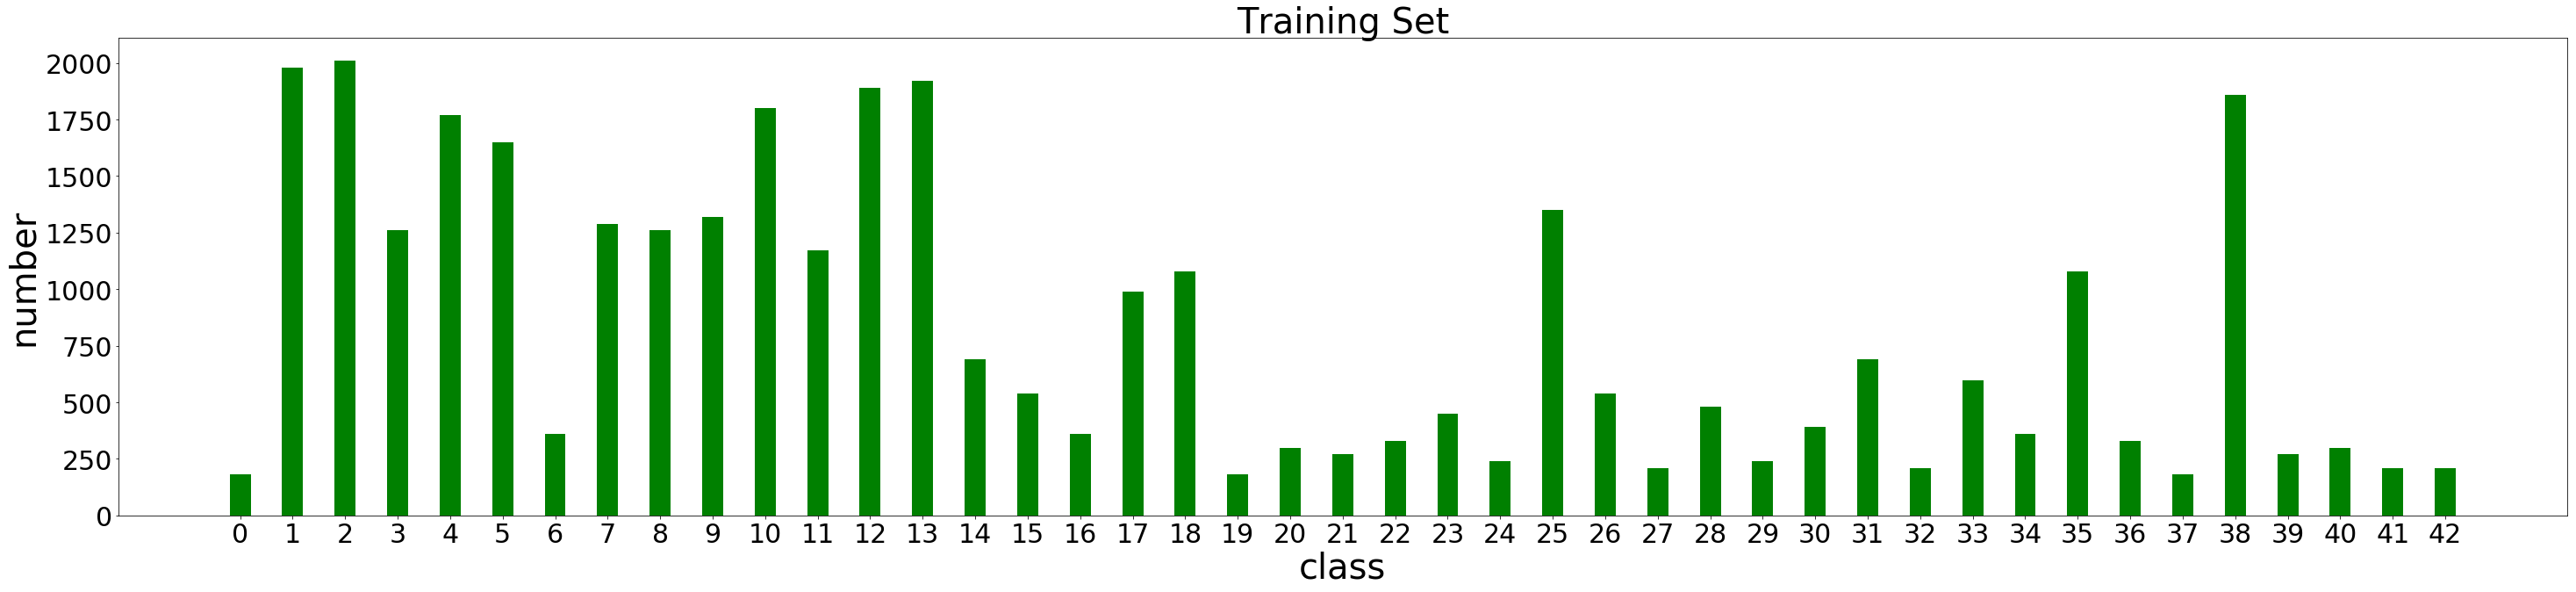

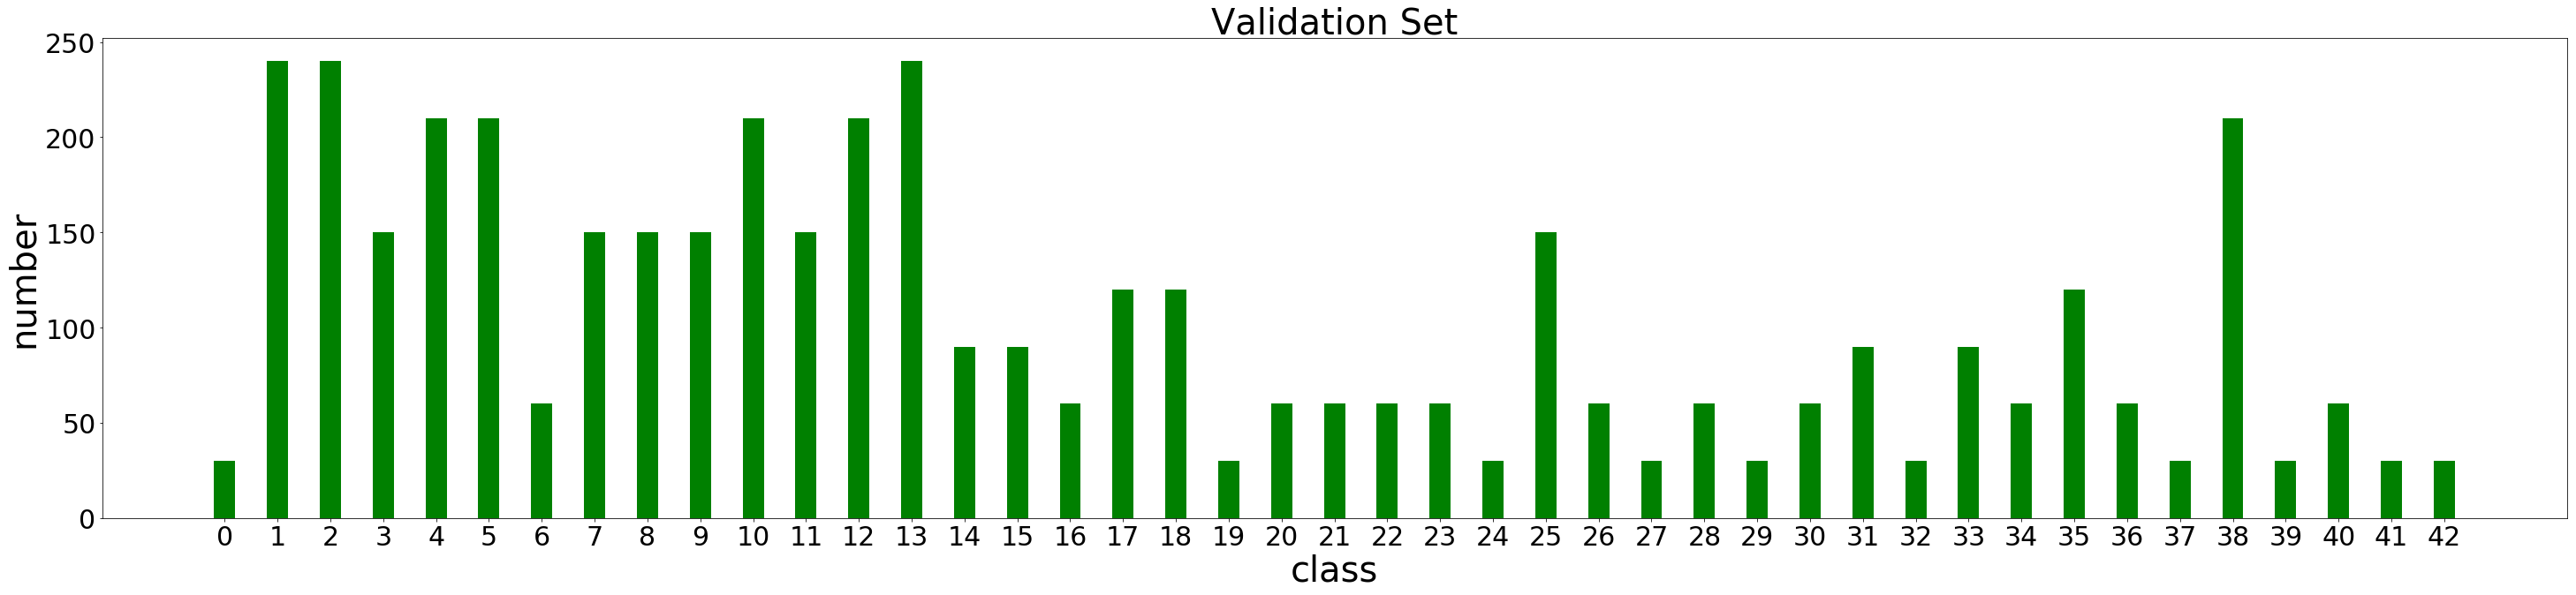

In [5]:
# Visualization of training and validation data frequency

plt.figure(1, figsize=(50,10))
statistics_visualization(X_train,y_train,'Training Set')
plt.figure(2, figsize=(50,10))
statistics_visualization(X_valid,y_valid, 'Validation Set')


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [6]:
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

def visulize_random_training_data(X_data, y_label, cmap='brg' ,number_image_column = 1):
    # sort data
    tuple_list = []  
    for i in range(X_data.shape[0]):
        tuple_list.append( (X_data[i], y_label[i]) )
    
    sort_data = sorted(tuple_list, key=lambda x: x[1]) #list of tuple
    
    counter=collections.Counter(y_label)

    class_index = [None] * n_classes
    for i in range(n_classes): 
   
        if i == 0:        
            class_index[i] = (0 , counter[i]-1)
        else:
            class_index[i] = (class_index[i-1][1]+1 ,class_index[i-1][1]+counter[i])
   
    #number_image_column = 1
    fig = plt.figure( figsize =(50,200))

    print ('checkpoint1')

    #grid = ImageGrid(fig, 111,  # similar to subplot(111)
    #                 nrows_ncols=(43, number_image_column),  # creates 2x2 grid of axes
    #                 axes_pad=0.1,  # pad between axes in inch.
    #                 )
    
    sub_plot_iter = 0
    for i in range(n_classes):
        for j in range(number_image_column):
            sub_plot_iter +=1
            index = random.randint(class_index[i][0], class_index[i][1])   
            im = sort_data[index][0]  
            plt.subplot(n_classes, number_image_column, sub_plot_iter)
            plt.imshow(im, cmap=cmap)

    plt.show()   

In [7]:
## random plot only one class of data from a given set For debug purpose
def visulize_data(X_data, y_label, class_nr, cmap='brg' ,number_image_column = 10):
    # sort data
    tuple_list = []  
    for i in range(X_data.shape[0]):
        tuple_list.append( (X_data[i], y_label[i]) )
    
    sort_data = sorted(tuple_list, key=lambda x: x[1]) #list of tuple
    
    counter=collections.Counter(y_label)

    class_index = [None] * n_classes
    for i in range(n_classes): 
   
        if i == 0:        
            class_index[i] = (0 , counter[i]-1)
        else:
            class_index[i] = (class_index[i-1][1]+1 ,class_index[i-1][1]+counter[i])
   
    #number_image_column = 1
    fig = plt.figure(figsize = (50,200))
   
    sub_plot_iter = 0
    for j in range(number_image_column):
        sub_plot_iter +=1
        index = random.randint(class_index[class_nr-1][0], class_index[class_nr-1][1])   
        im = sort_data[index][0]  
        plt.subplot(1, number_image_column, sub_plot_iter)
        plt.imshow(im, cmap=cmap)

    #plt.show()
    # return the index range of the class
    return [class_index[class_nr-1][0], class_index[class_nr-1][1] ]   
    


checkpoint1


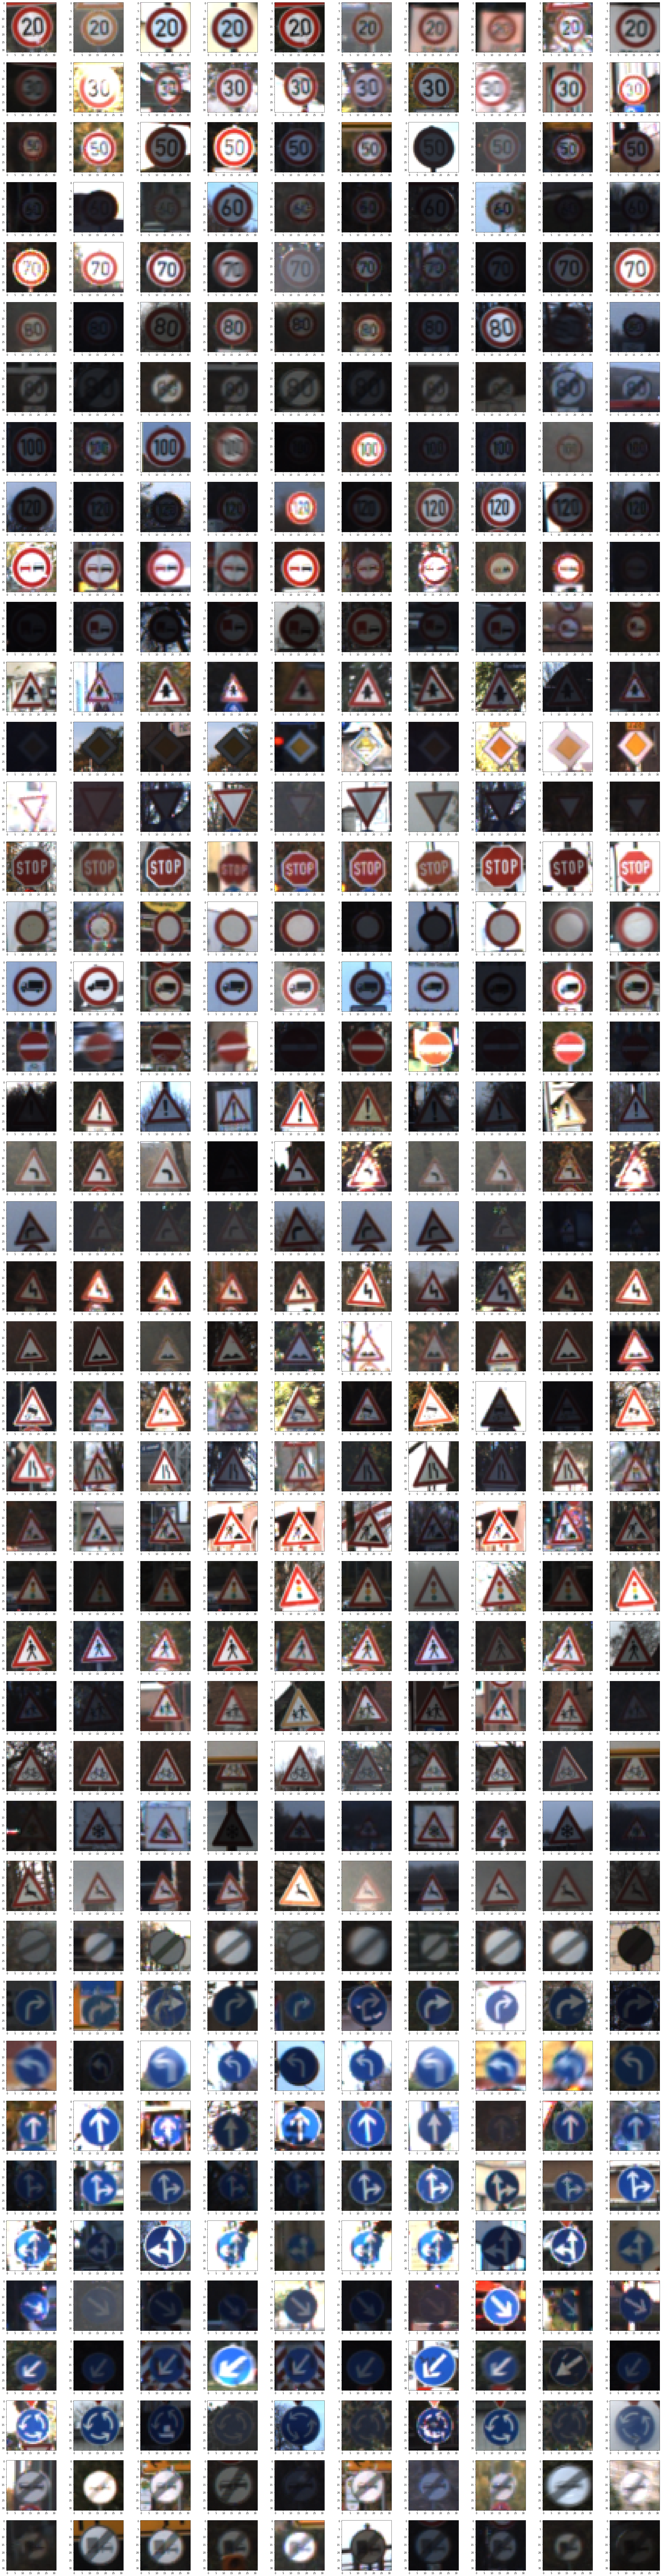

In [8]:
# Visualize Random images from a data set
visulize_random_training_data(X_train, y_train , number_image_column=10)

In [9]:
#visulize_data(X_train, y_train , 17, cmap='brg' ,number_image_column = 10)


In [10]:
#visulize_data(X_valid, y_valid , 17, cmap='brg' ,number_image_column = 10)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
import cv2
from skimage import exposure

def random_perspective_transform(image):
    width = 32
    
    # rotation 
    M = cv2.getRotationMatrix2D((width/2,width/2),random.randint(-15,15),random.uniform(0.7, 1.2))
    rotation = cv2.warpAffine(image,M,(width,width))
    
    # perspective transform 
    perturb_pixel1 = random.randint(0,3)  
    perturb_pixel2 = random.randint(0,3)  
    perturb_pixel3 = random.randint(0,3)  
    perturb_pixel4 = random.randint(0,3)  
    perturb_pixel5 = random.randint(0,3)  
    perturb_pixel6 = random.randint(0,3)  
    perturb_pixel7 = random.randint(0,3)  
    perturb_pixel8 = random.randint(0,3)  
    
    pts2 = np.float32([[0,0],[width,0],[0,width],[width,width]])
    
    pts1 = np.float32([[0+perturb_pixel1,0+perturb_pixel2],
                       [width-perturb_pixel3,0+perturb_pixel4],
                       [0+perturb_pixel5,width-perturb_pixel6],
                       [width-perturb_pixel7,width-perturb_pixel8]])

    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(rotation,M,(width,width))
    return dst

# input is a color image, output is a 1 channel image. 
def histogram_equalization(image):
    # convert to yuv 
    yuv_img = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb) # CV_RGB2YCrCb
    y_channel = yuv_img[:,:,0]
    equ_img = cv2.equalizeHist(y_channel)
    return equ_img
       
def rgb2gray(image):
    yuv_img = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb) # CV_RGB2YCrCb
    y_channel = yuv_img[:,:,0]
    #equ_img = cv2.equalizeHist(y_channel)
    return y_channel

def contrast_brightness_gray(image, alpha , beta):
    gray = rgb2gray(image)
    out = alpha * gray + beta
    low = np.ones(gray.shape) * 0.0 
    high = np.ones(gray.shape) * 255.0
    low_threshold =  out * (out > low ) + low * ( out < low )
    high_threshold = low_threshold * (low_threshold <= high) + high * (low_threshold >= high)
    return high_threshold.astype('uint8')


def contrast_brightness_rgb(image, alpha , beta):
    #image_float = image.astype('float')
    image_float = image
    out = alpha * image_float + beta
    low = np.ones(image.shape) *  0.0 
    high = np.ones(image.shape) * 255.0
    low_threshold =  out * (out > low) + low * ( out < low )
    high_threshold = low_threshold * (low_threshold <= high) + high * (low_threshold >= high)
    return high_threshold.astype('uint8')


### Balencing training set

In [12]:
# create a new training set with equal number of class
(class_index, sort_data, data_statistic) = create_class_index(X_train, y_train)
total_number_pro_class = 4000 # pro class should larger than the original class 
total_number_of_augmentation = 0 
for i in range(n_classes):
    total_number_of_augmentation += total_number_pro_class - (class_index[i][1] - class_index[i][0]+1)

augment_X_train = np.zeros([total_number_of_augmentation , 32,32,3], dtype=np.uint8)
augment_y_train = np.zeros(total_number_of_augmentation)

print ('Total number of augment: ' ,total_number_of_augmentation )

augment_iterator = 0
for i in range(n_classes):
    number_of_augmentation = total_number_pro_class - (class_index[i][1] - class_index[i][0]+1)
    if (number_of_augmentation > 0 ) :
        # print ('class , num_augmentation ', i, number_of_augmentation)
        for j in range(number_of_augmentation):
            index = random.randint(class_index[i][0], class_index[i][1])   
            # conduct random transformation of the data
            img = random_perspective_transform(sort_data[index][0])
            alpha = random.randint(10, 30)/ 10.0   
            beta  = random.randint(-50, 50)  
            img = contrast_brightness_rgb(img, alpha, beta)
            augment_X_train[augment_iterator] = img
            augment_y_train[augment_iterator] = sort_data[index][1]
            augment_iterator +=1
       

        
X_train_stack = np.append(X_train, augment_X_train, axis=0)
y_train_stack = np.append(y_train, augment_y_train, axis=0)

X_train, X_valid_tmp, y_train, y_valid_tmp = train_test_split(X_train_stack, y_train_stack, test_size=0.0, random_state=10)
       




Total number of augment:  137201


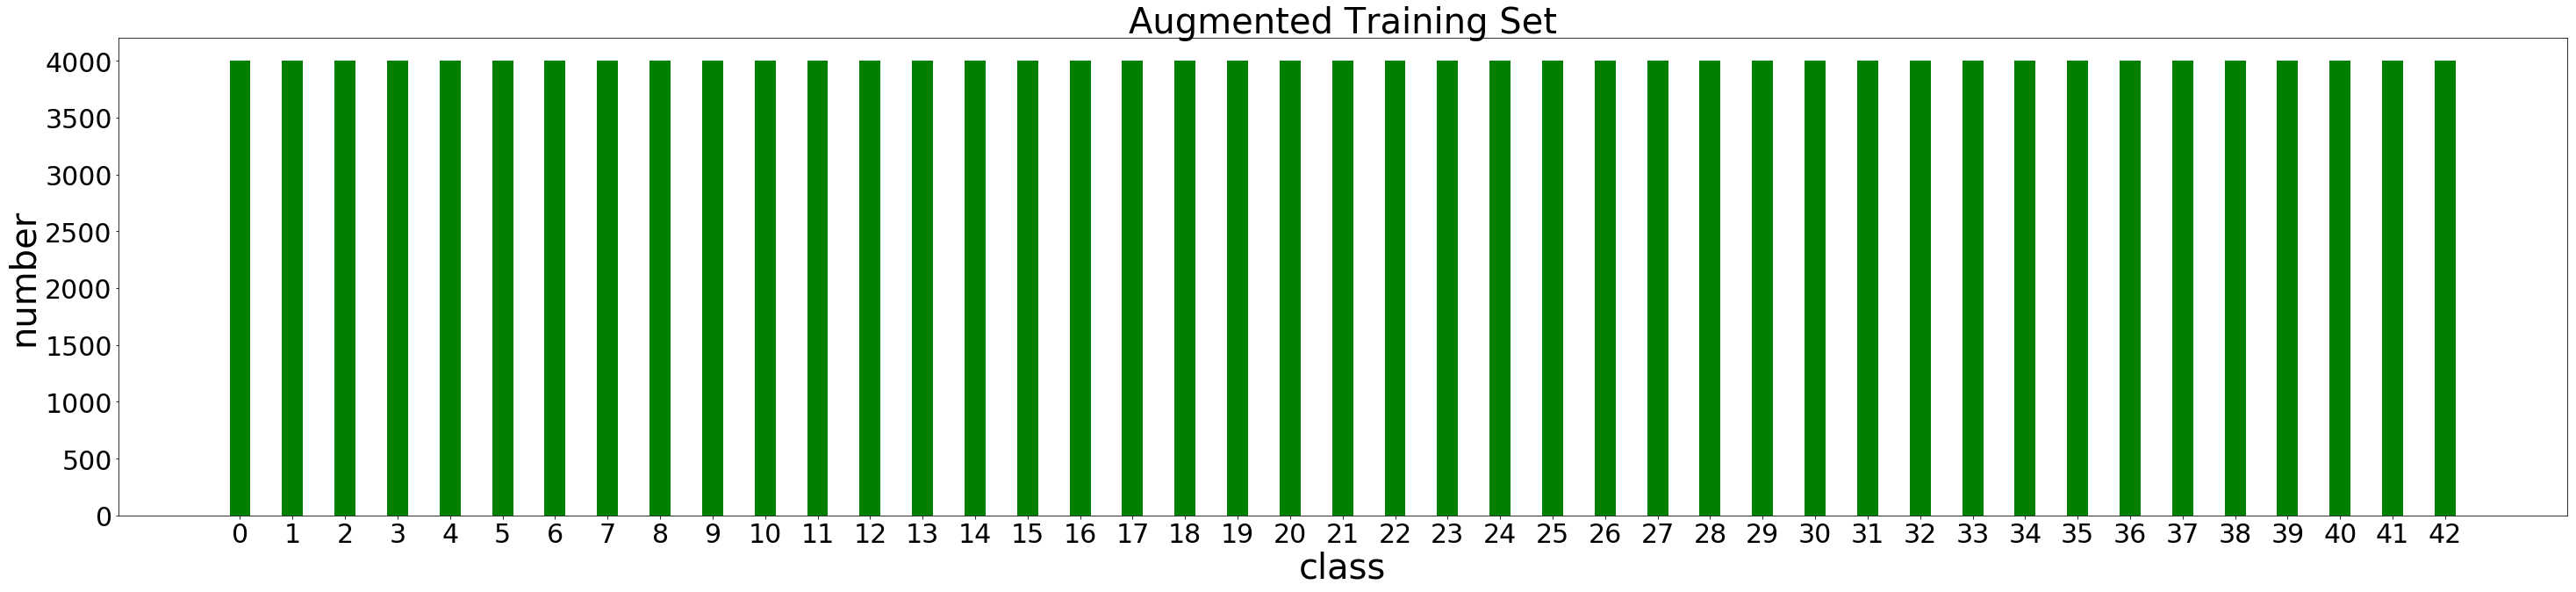

In [13]:
plt.figure(1, figsize=(50,10))
statistics_visualization(X_train,y_train,'Augmented Training Set')

### A visualization of jittering method (geometric transform and brightness change)

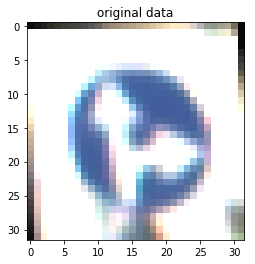

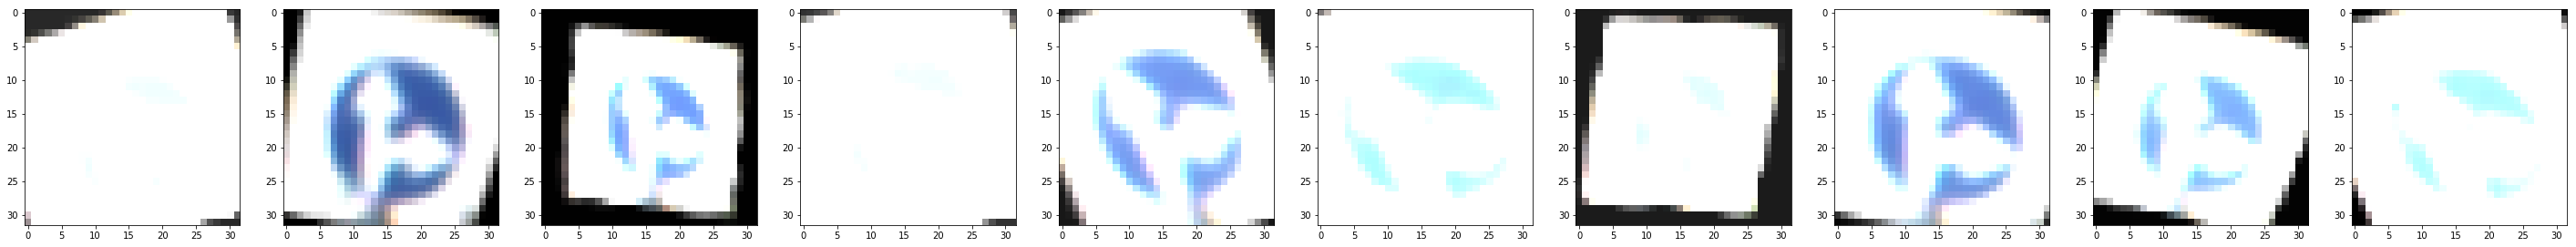

In [14]:
## Test random transformation
nrows = 1
ncols = 10

image = X_train[3201]
plt.figure(1)
plt.imshow(image)
plt.title('original data')
plt.figure(2, figsize=(50,50))
for i in range(10):
    img = random_perspective_transform(image)
    alpha = random.randint(10, 30)/ 10.0   
    beta = random.randint(-50, 50)   
    img = contrast_brightness_rgb(img , alpha, beta )
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(img)
    

## Data normalization 

In [15]:
# Data preprocessing pipeline
def preprocessing(X):
   
    # normalization 
    X_train_reshape = X
    x_norm = X_train_reshape/255.0
    return x_norm

In [16]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
# normalize a image
X_train =  preprocessing(X_train)
X_valid = preprocessing(X_valid)


### Model Architecture (Lenet + dropout)

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

mu = 0
sigma = 0.1
weights = {
'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 6],   mean = mu, stddev = sigma)),
'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16],  mean = mu, stddev = sigma)),
'wc3': tf.Variable(tf.truncated_normal([400,120],      mean = mu, stddev = sigma)),
'wc4': tf.Variable(tf.truncated_normal([120,84],       mean = mu, stddev = sigma)),
'wc5': tf.Variable(tf.truncated_normal([84,n_classes], mean = mu, stddev = sigma))

}

bias = {
'b1':  tf.Variable(tf.zeros(6)),
'b2':  tf.Variable(tf.zeros(16)),
'b3':  tf.Variable(tf.zeros(120)),
'b4':  tf.Variable(tf.zeros(84)),
'b5':  tf.Variable(tf.zeros(n_classes))
}

weights_new = {

# weights for the first 2* conv + pooling  
'wc1_1': tf.Variable(tf.truncated_normal([3, 3, 3, 6],   mean = mu, stddev = sigma)),    
'wc1_2': tf.Variable(tf.truncated_normal([3, 3, 3, 6],  mean = mu, stddev = sigma)),
'wc2_1': tf.Variable(tf.truncated_normal([3, 3, 6, 16],   mean = mu, stddev = sigma)),    
'wc2_2': tf.Variable(tf.truncated_normal([3, 3, 16, 16],  mean = mu, stddev = sigma)),
# weights for fully connected   
'wc3': tf.Variable(tf.truncated_normal([400,120],      mean = mu, stddev = sigma)),
'wc4': tf.Variable(tf.truncated_normal([120,84],       mean = mu, stddev = sigma)),
'wc5': tf.Variable(tf.truncated_normal([84,n_classes], mean = mu, stddev = sigma))

}

bias_new = {
'b1_1':  tf.Variable(tf.zeros(6)),
'b1_2':  tf.Variable(tf.zeros(6)),

'b2_1':  tf.Variable(tf.zeros(16)),
'b2_2':  tf.Variable(tf.zeros(16)),
# weights for fully connected   
'b3':  tf.Variable(tf.zeros(120)),
'b4':  tf.Variable(tf.zeros(84)),
'b5':  tf.Variable(tf.zeros(n_classes))
}


def LeNetModify(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    
    ## First 2Convnet + Maxpool 
    ###############################################################################
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x6.
    conv = tf.nn.conv2d(x, weights_new['wc1_1'], [1,1,1,1], 'VALID') + bias_new['b1_1']
    
    # TODO: Activation.
    conv = tf.nn.relu(conv) 
    
    # Output = 28x28x6.
    conv = tf.nn.conv2d(x, weights_new['wc1_2'], [1,1,1,1], 'VALID') + bias_new['b1_2']    
    # TODO: Activation.
    conv = tf.nn.relu(conv)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    ################################################################################
    
    ## second 2Convnet + Maxpool 
    #  Input 14x14x6 Filter 3x3 Output = 12x12x16.
    conv = tf.nn.conv2d(conv, weights_new['wc2_1'], [1,1,1,1], 'VALID') + bias_new['b2_1']
    # TODO: Activation.
    conv = tf.nn.relu(conv)

    #  Input 12x12x16 Filter 3x3 Output = 10x10x16.
    conv = tf.nn.conv2d(conv, weights_new['wc2_2'], [1,1,1,1], 'VALID') + bias_new['b2_2']
    # TODO: Activation.
    conv = tf.nn.relu(conv)
   
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

    ################################################################################
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv = flatten(conv)

   
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    conv = tf.add(tf.matmul(conv, weights_new['wc3']), bias_new['b3'])
    
    # TODO: Activation.
    conv = tf.nn.relu(conv)
    
    # drop out
    conv = tf.nn.dropout(conv , keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    conv = tf.add(tf.matmul(conv, weights_new['wc4']), bias_new['b4'])
    
    # TODO: Activation.
    conv = tf.nn.relu(conv)
    
    # Test add drop out 
    conv = tf.nn.dropout(conv , keep_prob)

    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(conv, weights_new['wc5']), bias_new['b5'])

    return logits


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer



    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv = tf.nn.conv2d(x, weights['wc1'], [1,1,1,1], 'VALID') + bias['b1']
    
    # TODO: Activation.
    conv = tf.nn.relu(conv)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv = tf.nn.conv2d(conv, weights['wc2'], [1,1,1,1], 'VALID') + bias['b2']

    # TODO: Activation.
    conv = tf.nn.relu(conv)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv = flatten(conv)

   
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    conv = tf.add(tf.matmul(conv, weights['wc3']), bias['b3'])
    
    # TODO: Activation.
    conv = tf.nn.relu(conv)
    
    # drop out
    conv = tf.nn.dropout(conv , keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    conv = tf.add(tf.matmul(conv, weights['wc4']), bias['b4'])
    
    # TODO: Activation.
    conv = tf.nn.relu(conv)
    
    # Test add drop out 
    conv = tf.nn.dropout(conv , keep_prob)

    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(conv, weights['wc5']), bias['b5'])

    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
global_step = tf.Variable(0, trainable=False)
#boundaries = [100000, 200000 , 500000]
#values = [0.001, 0.0005, 0.0001]
starter_learning_rate = 0.001
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           100000, 0.96, staircase=True)
#learning_rate = tf.train.piecewise_constant(global_step, boundaries, values)


one_hot_y = tf.one_hot(y, n_classes)
EPOCHS = 100
BATCH_SIZE = 128

rate = 0.001
l2_lambda = 0.0001
logits = LeNetModify(x)


#l2_regulazation = tf.nn.l2_loss(weights['wc3']) + tf.nn.l2_loss(weights['wc4']) + tf.nn.l2_loss(weights['wc5'])
l2_regulazation = tf.nn.l2_loss(weights_new['wc3']) + tf.nn.l2_loss(weights_new['wc4']) + tf.nn.l2_loss(weights_new['wc5'])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=one_hot_y) + l2_lambda * l2_regulazation
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation, global_step = global_step )

# shuffle training data 
from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train)



## Model evaluation

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y , keep_prob:1.0})        
        total_accuracy += (accuracy * len(batch_x))       
        
    return total_accuracy / num_examples  

In [20]:
## Training

In [21]:
#
validation_accuracy_min = 0.98
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            rate = sess.run(learning_rate, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            #loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_train = evaluate(X_train, y_train)
        # 
        
        print ('learning rate',rate)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(validation_accuracy_train))
        if (validation_accuracy >  validation_accuracy_min):
            print("Stop training")
            break
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

learning rate 0.001
EPOCH 1 ...
Validation Accuracy = 0.840
Training Accuracy = 0.757

learning rate 0.001
EPOCH 2 ...
Validation Accuracy = 0.926
Training Accuracy = 0.839

learning rate 0.001
EPOCH 3 ...
Validation Accuracy = 0.937
Training Accuracy = 0.867

learning rate 0.001
EPOCH 4 ...
Validation Accuracy = 0.952
Training Accuracy = 0.892

learning rate 0.001
EPOCH 5 ...
Validation Accuracy = 0.962
Training Accuracy = 0.898

learning rate 0.001
EPOCH 6 ...
Validation Accuracy = 0.961
Training Accuracy = 0.910

learning rate 0.001
EPOCH 7 ...
Validation Accuracy = 0.969
Training Accuracy = 0.919

learning rate 0.001
EPOCH 8 ...
Validation Accuracy = 0.966
Training Accuracy = 0.917

learning rate 0.001
EPOCH 9 ...
Validation Accuracy = 0.968
Training Accuracy = 0.918

learning rate 0.001
EPOCH 10 ...
Validation Accuracy = 0.974
Training Accuracy = 0.928

learning rate 0.001
EPOCH 11 ...
Validation Accuracy = 0.975
Training Accuracy = 0.930

learning rate 0.001
EPOCH 12

## Fine tuning stage

In [22]:
# tf.reset_default_graph()
save_file = './fine_tune_lenet'
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005)


validation_accuracy_min = 0.982
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')

    num_examples = len(X_train)
    
    print("Fine tune: Training...")
    print()
    X_train, y_train = shuffle(X_train, y_train)
        
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            rate = sess.run(learning_rate, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            #loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_train = evaluate(X_train, y_train)
        # 
       
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(validation_accuracy_train))
        if (validation_accuracy >  validation_accuracy_min):
            print("Stop training")
            validation_accuracy_min = validation_accuracy
            saver.save(sess, './fine_tune_lenet')
            print("Model saved")
        print()
        
    print("DONE!")

Fine tune: Training...

EPOCH 1 ...
Validation Accuracy = 0.981
Training Accuracy = 0.942

EPOCH 2 ...
Validation Accuracy = 0.978
Training Accuracy = 0.943

EPOCH 3 ...
Validation Accuracy = 0.980
Training Accuracy = 0.944

EPOCH 4 ...
Validation Accuracy = 0.980
Training Accuracy = 0.944

EPOCH 5 ...
Validation Accuracy = 0.980
Training Accuracy = 0.942

EPOCH 6 ...
Validation Accuracy = 0.978
Training Accuracy = 0.946

EPOCH 7 ...
Validation Accuracy = 0.982
Training Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.979
Training Accuracy = 0.948

EPOCH 9 ...
Validation Accuracy = 0.982
Training Accuracy = 0.949

EPOCH 10 ...
Validation Accuracy = 0.978
Training Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.981
Training Accuracy = 0.949

EPOCH 12 ...
Validation Accuracy = 0.983
Training Accuracy = 0.949
Stop training
Model saved

EPOCH 13 ...
Validation Accuracy = 0.981
Training Accuracy = 0.947

EPOCH 14 ...
Validation Accuracy = 0.981
Training Accuracy = 0.946

EPOCH 1

## Evaluate validation accuracy per class

In [24]:
X_valid = X_valid.astype(np.float32)
#test_out = LeNet(x)
save_file = './fine_tune_lenet'

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_file)
    num_examples = len(X_valid)
    X_valid, y_valid = shuffle(X_valid, y_valid)
    logit_output = sess.run( logits ,    feed_dict={x: X_valid, y: y_valid, keep_prob:1}) 
    one_hot_yy =   sess.run( one_hot_y , feed_dict={x: X_valid, y: y_valid, keep_prob:1})
    correct = np.zeros( (1,43) )
    total = np.zeros( (1,43) )
    for i in range(logit_output.shape[0]):
        total = total + one_hot_yy[i] 
        if  np.argmax(logit_output[i]) == np.argmax(one_hot_yy[i]) :
            correct = correct + one_hot_yy[i] 
    accuracy = correct * 1.0 / total
    print (correct)
    print (total)
    



[[  30.  236.  239.  149.  209.  208.   60.  148.  149.  150.  210.  150.
   210.  240.   89.   90.   60.  120.  118.   30.   53.   55.   60.   60.
    29.  149.   60.   30.   60.   25.   60.   90.   30.   89.   60.  120.
    60.   30.  210.   30.   44.   28.   30.]]
[[  30.  240.  240.  150.  210.  210.   60.  150.  150.  150.  210.  150.
   210.  240.   90.   90.   60.  120.  120.   30.   60.   60.   60.   60.
    30.  150.   60.   30.   60.   30.   60.   90.   30.   90.   60.  120.
    60.   30.  210.   30.   60.   30.   30.]]


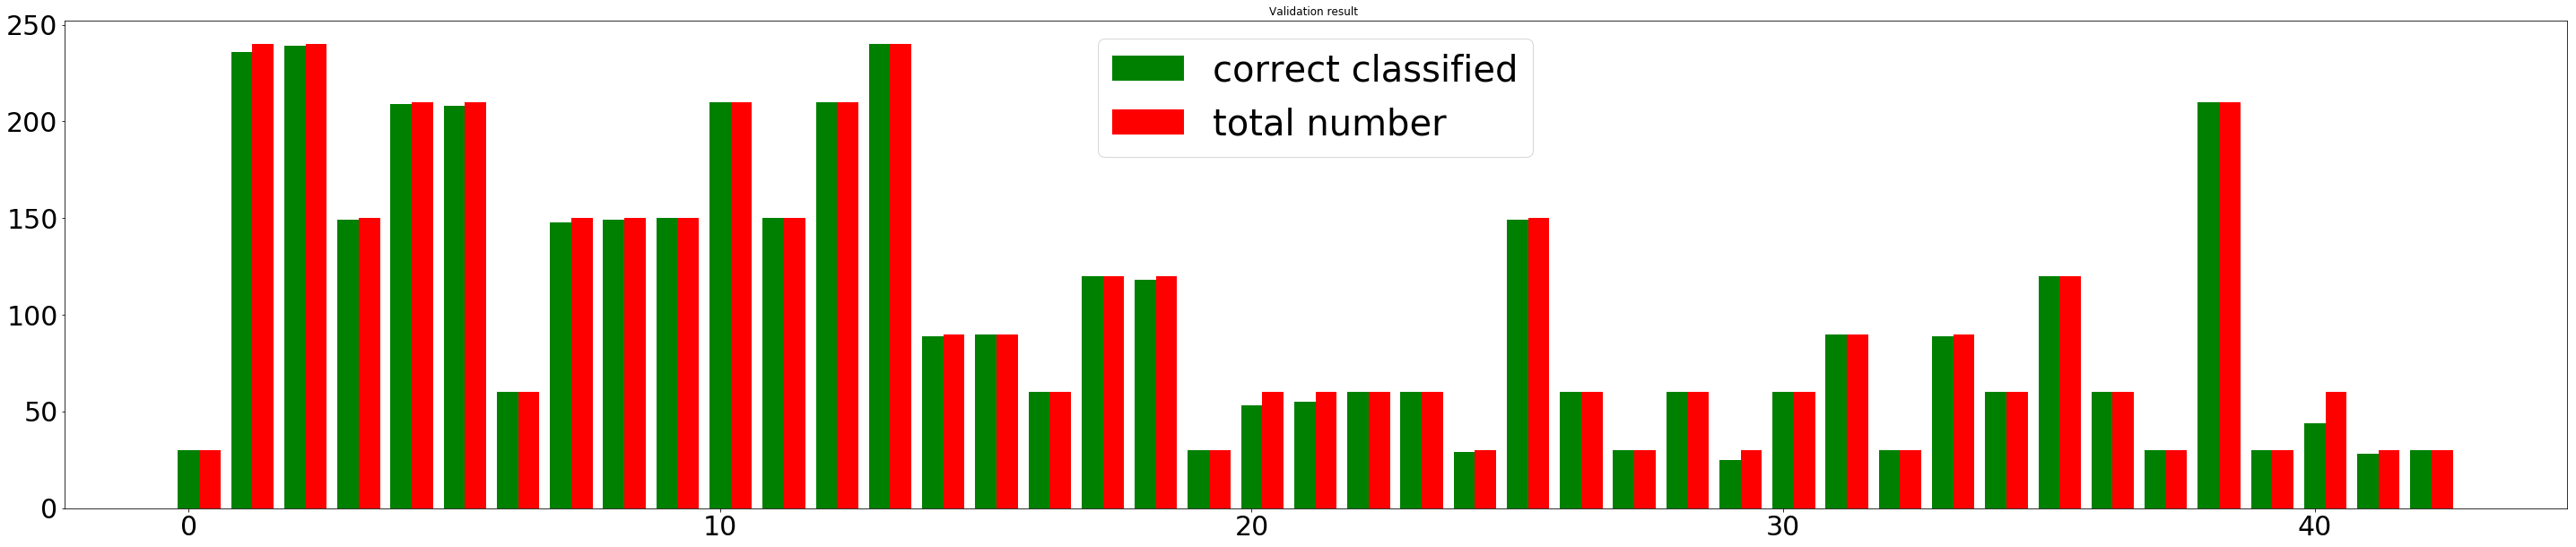

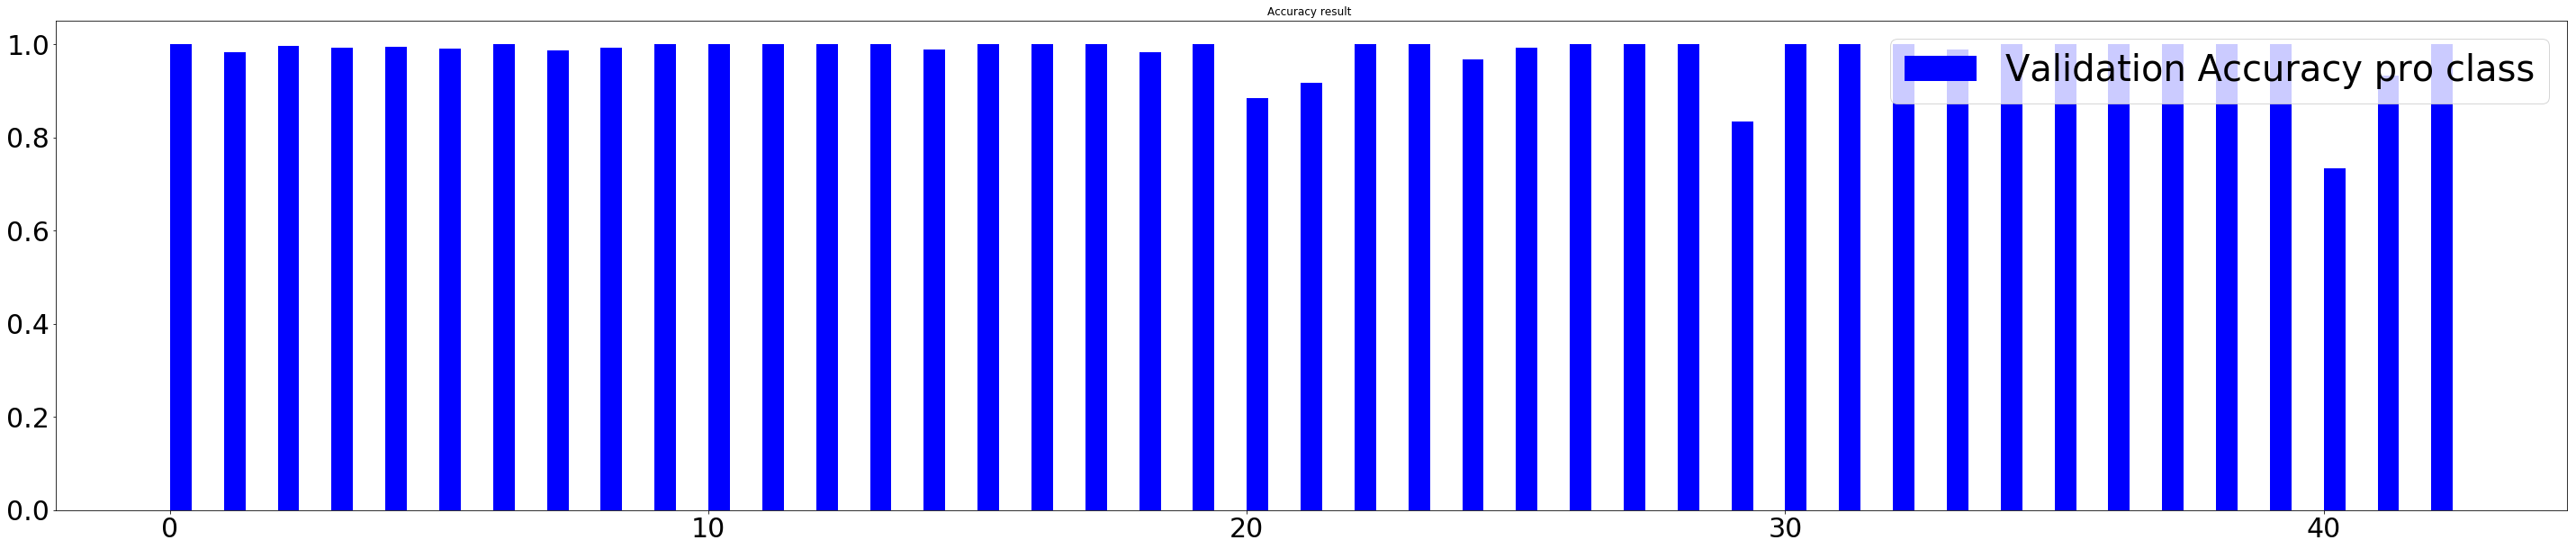

In [25]:
## Visualization of the validation result
import numpy as np
import matplotlib.pyplot as plt

 
n_groups = n_classes
plt.figure(1, figsize=(50,10))
index = np.arange(n_groups)
bar_width = 0.4
opacity = 1
rects2 = plt.bar(index , correct.reshape(n_groups).tolist(), bar_width,
                 alpha=opacity,
                 color='g',
                 label='correct classified')     
rects1 = plt.bar(index+ bar_width,  total.reshape(n_groups).tolist(), bar_width,
                 alpha=opacity,
                 color='r',
                 label='total number')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('Validation result ')
plt.legend(fontsize='40')

plt.figure(2, figsize=(50,10))
rects1 = plt.bar(index+ 0.5*bar_width,  accuracy.reshape(n_groups).tolist(), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Validation Accuracy pro class')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('Accuracy result ')
plt.legend(fontsize='40')


## Test the model on test set

In [27]:
X_test_normalize = preprocessing(X_test)

save_file = './fine_tune_lenet'
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_file)
    test_accuracy = evaluate(X_test_normalize, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.975


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

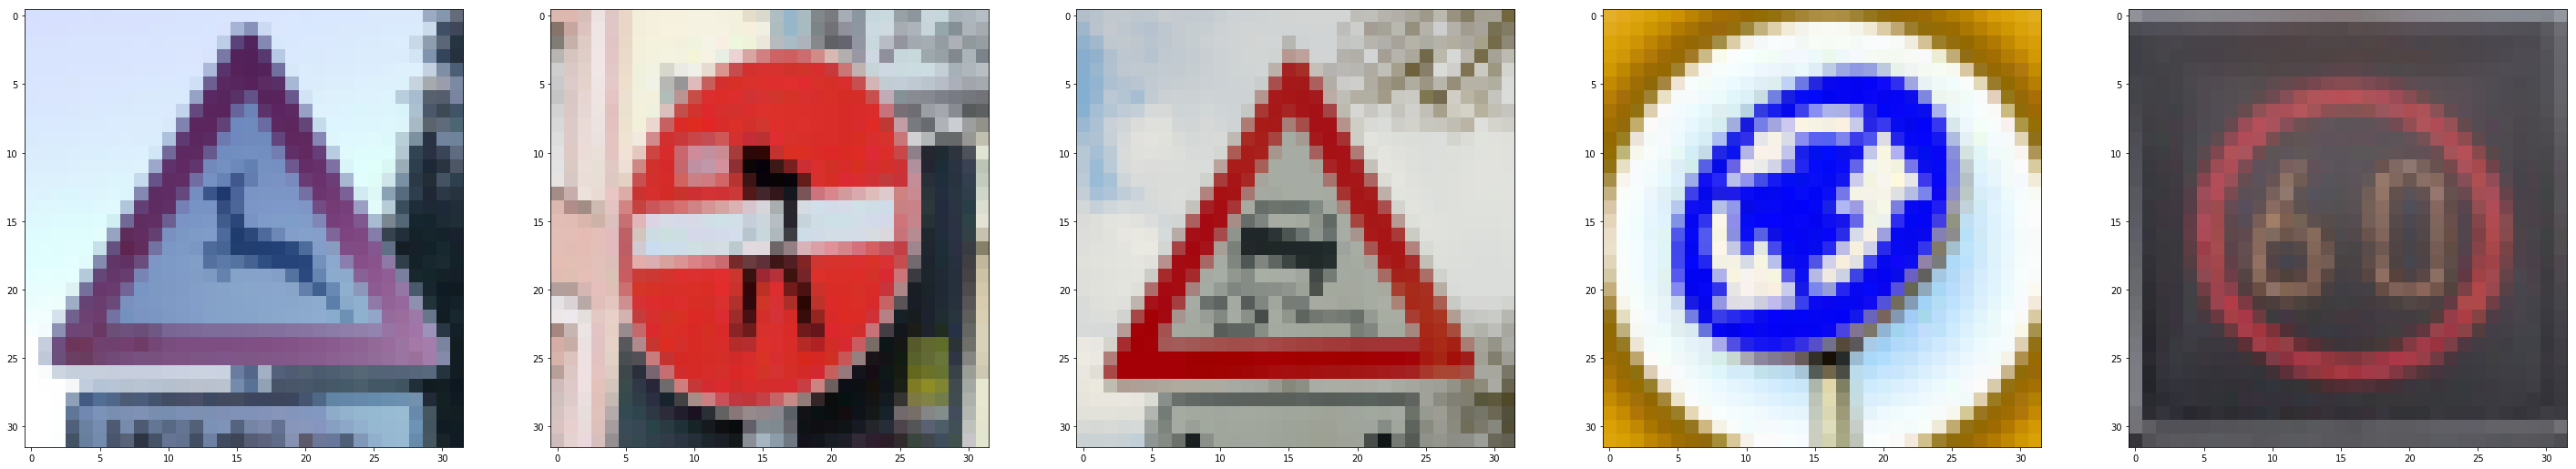

In [28]:
import cv2
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
test_1 = plt.imread('./test_data/11.png')
test_2=  plt.imread('./test_data/2.png')
test_3 = plt.imread('./test_data/3.png')
test_4 = plt.imread('./test_data/4.png')
test_5 = plt.imread('./test_data/5.png')

test_1 = cv2.resize(test_1,(32, 32), interpolation = cv2.INTER_AREA)
test_2 = cv2.resize(test_2,(32, 32), interpolation = cv2.INTER_AREA)
test_3 = cv2.resize(test_3,(32, 32), interpolation = cv2.INTER_AREA)
test_4 = cv2.resize(test_4,(32, 32), interpolation = cv2.INTER_AREA)
test_5 = cv2.resize(test_5,(32, 32), interpolation = cv2.INTER_AREA)

plt.figure(1, figsize = (50,10))
plt.subplot(151)
plt.imshow(test_1)
plt.subplot(152)
plt.imshow(test_2)
plt.subplot(153)
plt.imshow(test_3)
plt.subplot(154)
plt.imshow(test_4)
plt.subplot(155)
plt.imshow(test_5)
plt.show() 

X_web_test = np.zeros( (5,32,32,3))
X_web_test[0] = test_1
X_web_test[1] = test_2
X_web_test[2] = test_3
X_web_test[3] = test_4
X_web_test[4] = test_5

y_web_test =  np.zeros((5,))
y_web_test[0] = 31
y_web_test[1] = 17
y_web_test[2] = 23
y_web_test[3] = 40
y_web_test[4] = 3



### Predict the Sign Type for Each Image

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
save_file = './fine_tune_lenet'
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_file)
    test_accuracy = evaluate(X_web_test, y_web_test)
    logit_output = sess.run( logits ,    feed_dict={x: X_web_test, y: y_web_test, keep_prob:1}) 
    one_hot_yy =   sess.run( one_hot_y , feed_dict={x: X_web_test, y: y_web_test, keep_prob:1})
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    for i in range(logit_output.shape[0]):
        print ('prediction', np.argmax(logit_output[i]) ,'Truth', np.argmax(one_hot_yy[i]) )
    


Test Accuracy = 0.800
prediction 31 Truth 31
prediction 17 Truth 17
prediction 23 Truth 23
prediction 39 Truth 40
prediction 3 Truth 3


### Analyze Performance

In [30]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.





### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [31]:
def top5plot(topk_input ):
    number_plot = topk_input.values.shape[0]
    
    for i in range(number_plot):
        plt.figure(1, figsize=(50,10))
        bar_width = 0.4
        opacity = 1
        
        plt.subplot(2,5, i+6)
        index = np.arange(5)       
        rects2 = plt.bar(index, topk_input.values[i].tolist(), bar_width,
                         alpha=opacity, color='b',label='')     

        plt.tick_params(axis='both', which='major', labelsize=30)
        ticks = plt.xticks(list(range(5)) , sign_name[topk_input.indices[i]],rotation='vertical' )
        plt.legend(fontsize='40')


In [32]:
import pandas as pd
traffic_sign_name = pd.read_csv('signnames.csv')

sign_name =traffic_sign_name['SignName']
 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


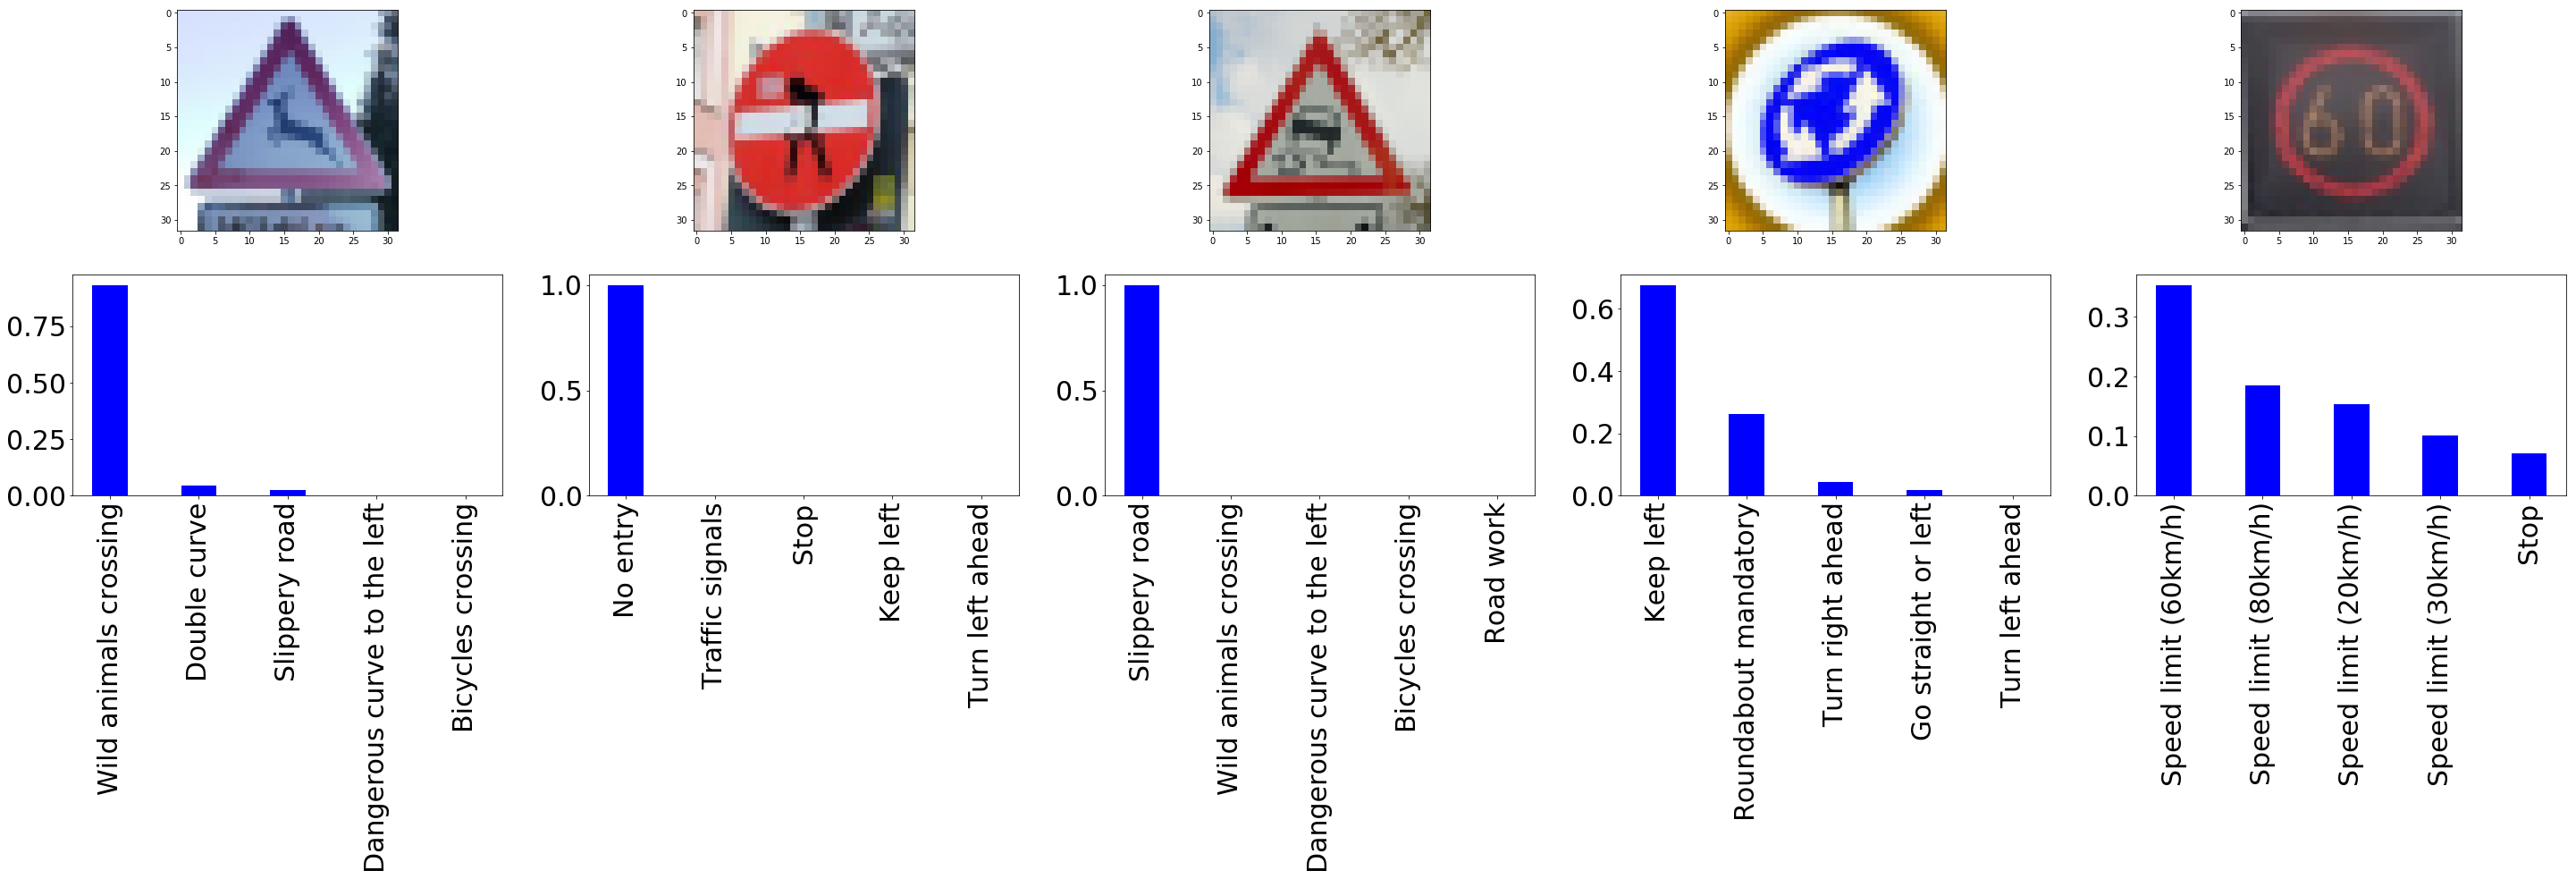

In [33]:
import pandas as pd
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

## read from panda 

traffic_sign_name = pd.read_csv('signnames.csv')
sign_name =traffic_sign_name['SignName']


prob = tf.nn.softmax(logits, dim=-1, name=None)
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=one_hot_y) + l2_lambda * l2_regulazation
top_k  = [] 
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_file)
    prob_out = sess.run( prob ,    feed_dict={x: X_web_test, y: y_web_test, keep_prob:1})
    top_k = sess.run(tf.nn.top_k(tf.constant(prob_out), k=5))
    #print (top_k)
    
# top five probability

plt.figure(1, figsize = (50,10))
plt.subplot(251)
plt.imshow(test_1)
plt.subplot(252)
plt.imshow(test_2)
plt.subplot(253)
plt.imshow(test_3)
plt.subplot(254)
plt.imshow(test_4)
plt.subplot(255)
plt.imshow(test_5)
# plot a bar for each  
top5plot(top_k)
plt.show() 

    

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 